Hanel et al., iScience 2025

### Fig. 2 UMAP - the hematopoietic tree 
### Fig. 6 E2F vs. Pd
### Fig. 7 CDK2/4/6 vs. Pd

In [2]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(anndata)
library(edgeR)
library(scales)
library(knitr)
library(viridis)
library(ComplexHeatmap)
library(circlize)
#library(ggcorrplot)
library(ggtern)
library(RColorBrewer)
library(corrplot)
library(Seurat)

fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

set.seed(42) 
Sys.time()


[1] "2025-03-26 21:13:13 EET"

In [3]:
data <- readRDS ("/research/work/andreha/privat/Andrea/2025_Sylvain/data/seurat_obj_0.2_5.rds")
data

An object of class Seurat 
24760 features across 95685 samples within 1 assay 
Active assay: RNA (24760 features, 4000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

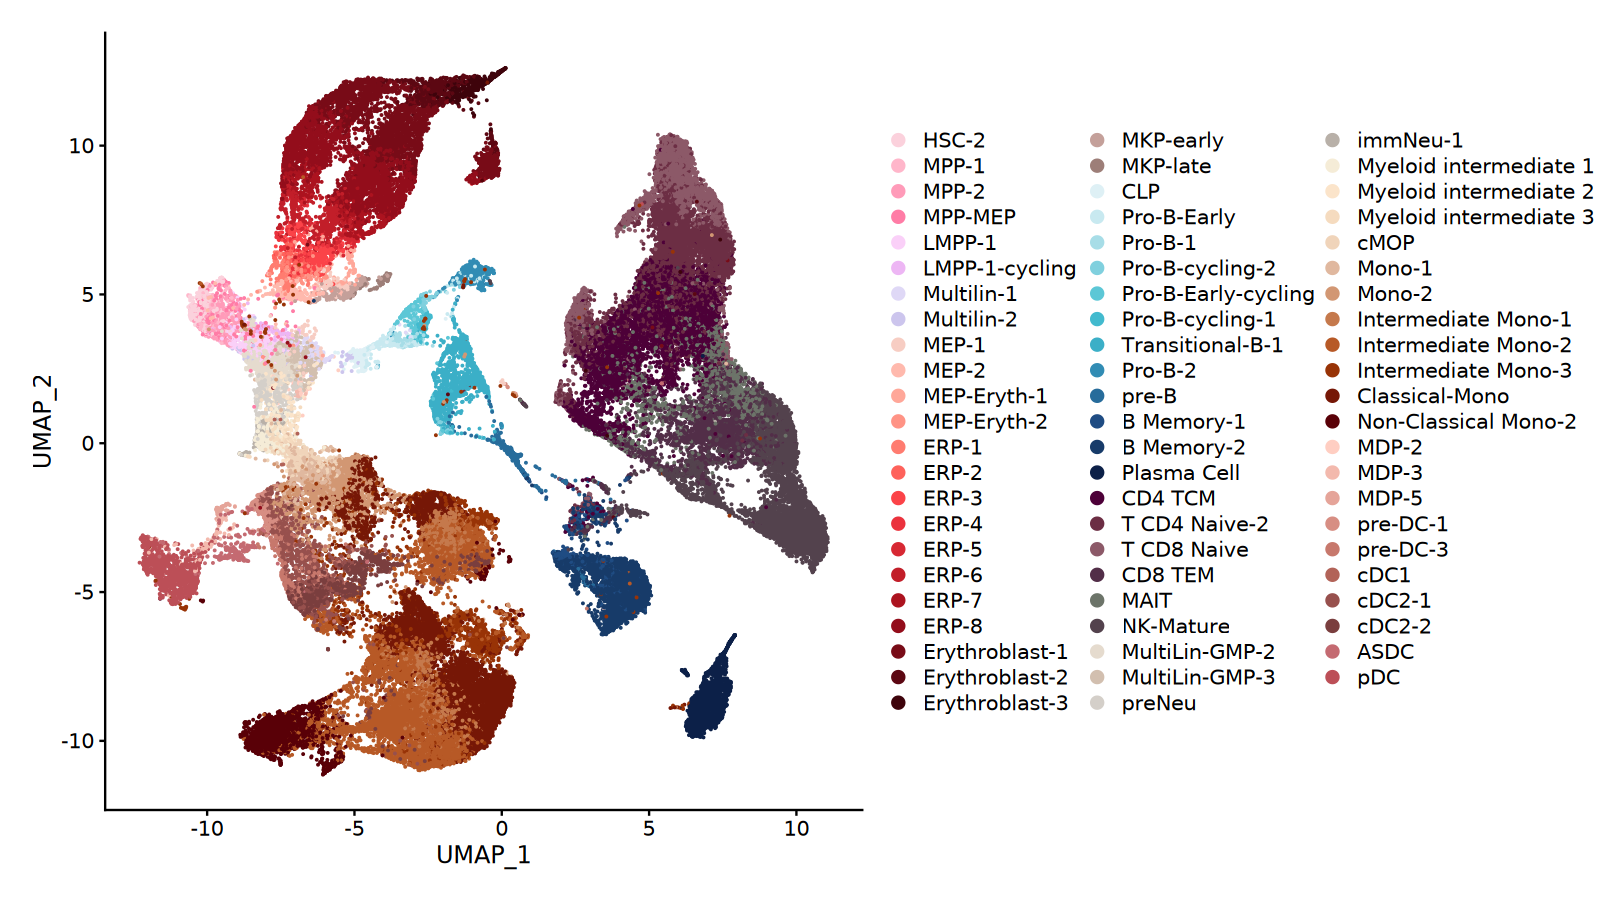

In [4]:
#Sun test

colorcode <- c(
  #HSPC
  "HSC-2"   = "#fbd1dc",  
  "MPP-1"   = "#ffb6ca",  
  "MPP-2"   = "#ff9bb9",  
  "MPP-MEP" = "#ff7ca6",   

"LMPP-1"         = "#FAD0F8", 
"LMPP-1-cycling" = "#EDB6F4",  

"Multilin-1" = "#DFD8F6", 
"Multilin-2" = "#CCC5ED", 

  "MEP-1" = "#F7CDC3",
  "MEP-2" = "#ffb9ad",
  "MEP-Eryth-1" = "#ffa799",
  "MEP-Eryth-2" = "#ff9385",

  "ERP-1" = "#ff7c70",
  "ERP-2" = "#fe625b",
  "ERP-3" = "#fb4348",
  "ERP-4" = "#eb323d",
  "ERP-5" = "#d72833",
  "ERP-6" = "#c21e29",
  "ERP-7" = "#ac131f",
  "ERP-8" = "#930d1b",

  "Erythroblast-1" = "#780b17",
  "Erythroblast-2" = "#5c0712",
  "Erythroblast-3" = "#3e030b",


  # MkP
  "MKP-early" = "#C4A09A",  
  "MKP-late" = "#9D7E78",  

  # lymphoid 
  "CLP" = "#DEF0F5",  
  "Pro-B-Early" = "#c8e9f0",  
  "Pro-B-1" = "#a7dde7",  
  "Pro-B-cycling-2" = "#80d0de",  
  "Pro-B-Early-cycling" = "#5cc7d6",  
  "Pro-B-cycling-1" = "#42bace",  
  "Transitional-B-1" = "#3bafc7",  
  "Pro-B-2" = "#318cb4",  
  "pre-B" = "#276C9B",  
  "B Memory-1" = "#1F4C83",  
  "B Memory-2" = "#173B69",  
  "Plasma Cell" = "#0C2048",  

  # T NK
  "CD4 TCM" = "#4D0038",  
  "T CD4 Naive-2" = "#6C2E44",  
  "T CD8 Naive" = "#8C5968",  
  "CD8 TEM" = "#522E48",  
  "MAIT" = "#6C7469",  
  "NK-Mature" = "#53424d",  

  "MultiLin-GMP-2" = "#e5dbce",  
  "MultiLin-GMP-3" = "#D2BFAF",  
    
  "preNeu"    = "#d4cfc9",  
  "immNeu-1"  = "#b8b0a8",  

  "Myeloid intermediate 1" = "#F5ECD7",  
  "Myeloid intermediate 2" = "#FBE4CA",  
  "Myeloid intermediate 3" = "#F5DBBF",  

  # Myeloid 
  "cMOP" = "#F0D4BA",  
  "Mono-1" = "#E0B89F",  
  "Mono-2" = "#D29773",  
  "Intermediate Mono-1" = "#C5794C",  
  "Intermediate Mono-2" = "#B75926",  
  "Intermediate Mono-3" = "#983306",  
  "Classical-Mono" = "#761706",  
  "Non-Classical Mono-2" = "#590007",  

  # DC 
  "MDP-2"     = "#ffcec2",  
  "MDP-3"     = "#f3b9ad",
  "MDP-5"     = "#e5a499",
  "pre-DC-1"  = "#d78e83",
  "pre-DC-3"  = "#c7786c",

  "cDC1"      = "#b26358",
  "cDC2-1"    = "#97504d",
  "cDC2-2"    = "#7a3e3e",
    
  "ASDC" = "#C46A71",  

  "pDC" = "#BC4F57"  

)

labelorder <- names(colorcode)

Idents(data) <- factor(Idents(data), 
                       levels = names(colorcode))


fig(13.5, 7.5)
 DimPlot(data, reduction = "umap", cols = colorcode, pt.size = 0.05) +
  guides(color = guide_legend(override.aes = list(size = 3), ncol = 3)) +
  theme(plot.margin = margin(0.5, 1, 0.5, 0.5, "cm"))

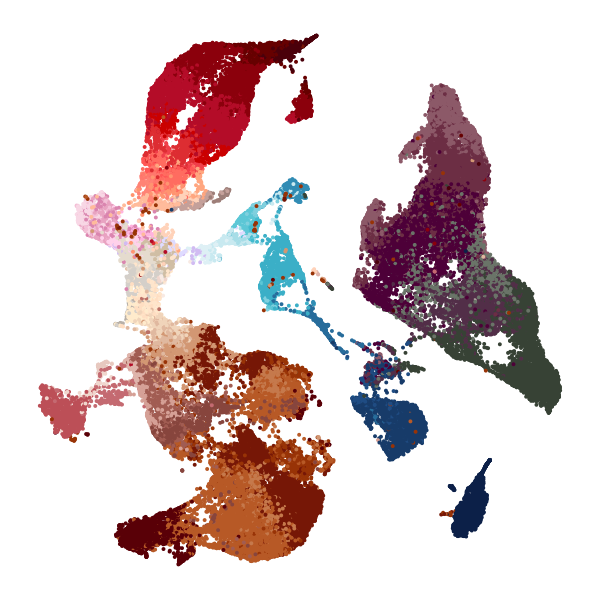

In [16]:
fig(5, 5)
umap_plot <- DimPlot(data, 
                     reduction = "umap", 
                     cols = colorcode, 
                     pt.size = 0.05) +
  theme_void() +
  theme(legend.position = "none") +
  coord_fixed()
umap_plot

In [9]:
ggsave("./data/Fig2_UMAP_v2_celltypes.pdf", 
       umap_plot, width = 5, height = 5)#, units = "in", dpi = 300)


In [5]:
ad <- read_h5ad ("/research/work/andreha/privat/Andrea/2025_Sylvain/data/pdata_HCAmt_MAD5_Level3M.h5ad")

ad$obs$cell_type =  as.factor(ad$obs$`Level 3M`)

In [6]:
class(ad$obs$cell_type)

[1] "factor"

In [7]:
ad

AnnData object with n_obs × n_vars = 634 × 20898
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'study', 'sex', 'age', 'disease', 'disease_category', 'age_category', 'age_ontology', 'blasts_pct', 'risk', 'psbulk_n_cells', 'psbulk_counts', 'cell_type'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'psbulk_props'

In [8]:
#----------
MIN_CELLS = 10
MIN_READS =50000 #50.000 as in EdgeR notebook

keep.samples <-  ad$obs$psbulk_n_cells >= MIN_CELLS
table(keep.samples)

ad_filtr <- subset(ad, ad$obs$psbulk_n_cells >= MIN_CELLS)
keep.samples <-  ad_filtr$obs$psbulk_counts >= MIN_READS
table(keep.samples)

ad_filtr <- subset(ad_filtr, ad_filtr$obs$psbulk_counts >= MIN_READS)
ad_filtr

keep.samples
FALSE  TRUE 
  108   526 

keep.samples
FALSE  TRUE 
    7   519 

View of AnnData object with n_obs × n_vars = 519 × 20898
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'study', 'sex', 'age', 'disease', 'disease_category', 'age_category', 'age_ontology', 'blasts_pct', 'risk', 'psbulk_n_cells', 'psbulk_counts', 'cell_type'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'psbulk_props'

In [9]:
cell_type_counts <- ad_filtr$obs %>%
  group_by(cell_type) %>%
  summarise(donor_count = n_distinct(donor_id))

low_donor_cell_types <- cell_type_counts %>%
  filter(donor_count < 5) %>%
  pull(cell_type)

ad_filtr <- subset(ad_filtr, !ad_filtr$obs$cell_type %in% low_donor_cell_types)
ad_filtr

View of AnnData object with n_obs × n_vars = 501 × 20898
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'study', 'sex', 'age', 'disease', 'disease_category', 'age_category', 'age_ontology', 'blasts_pct', 'risk', 'psbulk_n_cells', 'psbulk_counts', 'cell_type'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'psbulk_props'

In [10]:
ad_filtr$obs$cell_type <- factor(ad_filtr$obs$cell_type) 
nlevels(ad_filtr$obs$cell_type) 

[1] 68

In [11]:
x = t(ad_filtr$X)
head(x)

sampleinfo = ad_filtr$obs %>%
#select (., -c("sample")) %>%
rownames_to_column ("sample")

sampleinfo$cell_type <- droplevels(sampleinfo$cell_type)
head(sampleinfo, n=3)

,BM1_ASDC,BM2_ASDC,BM3_ASDC,BM4_ASDC,BM5_ASDC,BM6_ASDC,BM7_ASDC,BM8_ASDC,BM1_B Memory-1,BM2_B Memory-1,⋯,BM7_pre-DC-3,BM8_pre-DC-3,BM1_preNeu,BM2_preNeu,BM3_preNeu,BM4_preNeu,BM5_preNeu,BM6_preNeu,BM7_preNeu,BM8_preNeu
A1BG,6,9,16,14,12,8,16,22,8,8,⋯,5,8,22,2,15,23,19,36,14,56
A1BG-AS1,0,0,0,2,0,0,0,0,0,3,⋯,0,0,2,1,0,2,1,1,3,2
A1CF,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M-AS1,1,0,1,0,0,0,1,0,0,0,⋯,2,0,0,0,2,2,1,1,2,2
A2ML1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


,sample,donor_id,Level 3M,Level 2,Level 1,study,sex,age,disease,disease_category,age_category,age_ontology,blasts_pct,risk,psbulk_n_cells,psbulk_counts,cell_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,BM1_ASDC,BM1,ASDC,Dendritic,ASDC,HCA,F,52.0,healthy,healthy,middle aged (40-60),HsapDv:0000267,healthy,healthy,14,128299,ASDC
2,BM2_ASDC,BM2,ASDC,Dendritic,ASDC,HCA,M,50.0,healthy,healthy,middle aged (40-60),HsapDv:0000267,healthy,healthy,13,94350,ASDC
3,BM3_ASDC,BM3,ASDC,Dendritic,ASDC,HCA,M,39.0,healthy,healthy,young adult (15-39),HsapDv:0000266,healthy,healthy,39,254625,ASDC


In [12]:
table(colnames(x)==sampleinfo$sample)

y <- DGEList (counts =x, 
              group = sampleinfo$cell_type, 
              genes = rownames (x))

keep <- filterByExpr(y)
table(keep)



TRUE 
 501 

keep
FALSE  TRUE 
10732 10166 

In [13]:
y <- calcNormFactors(y, method = "TMM") #default in TMM
head(y$samples)

min (y$samples$norm.factors)
max (y$samples$norm.factors)

cpm <- cpm(y, normalized.lib.sizes=TRUE)
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
head (logcpm, n=2)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
BM1_ASDC,ASDC,128299,1.3216917
BM2_ASDC,ASDC,94350,1.2750550
BM3_ASDC,ASDC,254625,1.0764451
BM4_ASDC,ASDC,165164,1.3296629
BM5_ASDC,ASDC,365020,0.9916016
BM6_ASDC,ASDC,143945,1.3089698


[1] 0.295656

[1] 1.809038

,BM1_ASDC,BM2_ASDC,BM3_ASDC,BM4_ASDC,BM5_ASDC,BM6_ASDC,BM7_ASDC,BM8_ASDC,BM1_B Memory-1,BM2_B Memory-1,⋯,BM7_pre-DC-3,BM8_pre-DC-3,BM1_preNeu,BM2_preNeu,BM3_preNeu,BM4_preNeu,BM5_preNeu,BM6_preNeu,BM7_preNeu,BM8_preNeu
A1BG,5.2128235,6.2576748,5.9087701,6.032362,5.1233612,5.4647227,6.0704914,6.1606479,4.9451816,5.314321,⋯,4.3886514,4.9486887,4.713479,3.448218,5.4293456,5.290852,4.346453,5.886100,5.029609,5.811049
A1BG-AS1,0.7684141,0.7684141,0.7684141,3.434337,0.7684141,0.7684141,0.7684141,0.7684141,0.7684141,3.998714,⋯,0.7684141,0.7684141,1.975864,2.657437,0.7684141,2.310169,1.424612,1.721985,3.059652,1.866982


## calculate Pd

In [14]:
post_g1s = read.table ("/research/work/andreha/privat/Andrea/2024_Sylvain/data/postG1S_updated.csv", header = TRUE, sep = ",")
post_g1s = post_g1s$genes
post_g1s

x_pink <- x[post_g1s, ]

x_pink_normalized <- t(apply(x_pink, 1, function(gene_counts) {
  gene_counts / sampleinfo$psbulk_n_cells  
}))

x_pink_zscore <- t(apply(x_pink_normalized, 1, function(gene_counts) {
  (gene_counts - mean(gene_counts, na.rm = TRUE)) / sd(gene_counts, na.rm = TRUE)
}))

sample_avg_zscore <- colMeans(x_pink_zscore, na.rm = TRUE)

score_df <- data.frame(sample = names(sample_avg_zscore), avg_zscore = sample_avg_zscore)

combined_df <- merge(score_df, sampleinfo, by = "sample")

combined_df$prop2div <- (combined_df$avg_zscore - min(combined_df$avg_zscore)) /
                         (max(combined_df$avg_zscore) - min(combined_df$avg_zscore))

combined_df$`Level 3M` <- factor(combined_df$`Level 3M`, levels = names(colorcode))

[1] "AURKB"   "BIRC5"   "CCNA2"   "CDC20"   "CENPA"   "CENPI"   "CKAP5"  
 [8] "DDX21"   "ECT2"    "ESPL1"   "KIF11"   "KIF23"   "NCAPD2"  "NDC80"  
[15] "PLK1"    "POLR2B"  "RACGAP1" "RANGAP1" "RBBP6"   "RBMX"    "SF1"    
[22] "SFPQ"    "SMC4"    "SON"     "TOP2A"   "TPX2"    "WDR43"   "ZMAT2"  
[29] "KNL1"

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


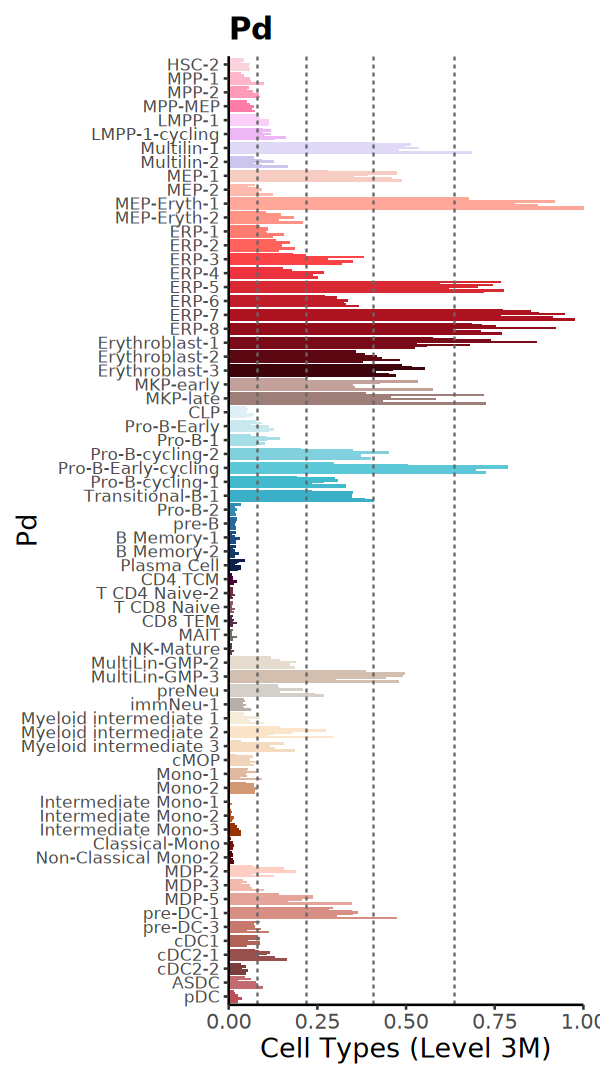

In [17]:
library(classInt)

#------------------------
jenks_breaks <- classInt::classIntervals(combined_df$prop2div, n = 5, 
                                         style = "jenks")

combined_df$jenks_group <- cut(combined_df$prop2div,
                                  breaks = jenks_breaks$brks,
                                  include.lowest = TRUE,
                                  labels = paste0("Group ", 1:5))
combined_df$`Level 3M` <- factor(combined_df$`Level 3M`, levels = rev(labelorder))
jenks_y_breaks <- sort(jenks_breaks$brks)
#------------------------

barplot <- ggplot(combined_df, 
                  aes(x = `Level 3M`, 
                      y = prop2div, 
                      fill = `Level 3M`, 
                      group = `donor_id`)) +
  geom_bar(stat = "identity", 
           position = position_dodge(width = 0.8), 
           show.legend = FALSE) +
  scale_fill_manual(values = colorcode) +
  #  Jenks separators
  geom_hline(yintercept = jenks_y_breaks[-c(1, length(jenks_y_breaks))], 
             linetype = "dashed", color = "gray40", linewidth = 0.5) +
  scale_y_continuous(expand = c(0, 0)) +
  coord_cartesian(ylim = c(0, max(combined_df$prop2div, na.rm = TRUE))) +
  coord_flip() +
  theme_classic() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 12),
    axis.title.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold"),
    plot.margin = margin(10, 10, 10, 10)
  ) +
  labs(x = "Pd", y = "Cell Types (Level 3M)", title = "Pd")

fig (5,9)
barplot

In [19]:
library(classInt)

jenks_result <- classIntervals(combined_df$prop2div, 
                               n = 5, style = "jenks")

jenks_result$brks

[1] 0.0000000 0.0818961 0.2205019 0.4072670 0.6360495 1.0000000

In [99]:
total_gene_conc_data <- read.csv("./data/total_gene_conc_data3.csv", stringsAsFactors = FALSE)
head(total_gene_conc_data, n=2)

,sample,totalE2F_norm_sum,totalRB_norm_sum,totalRB1_norm_sum,totalCDKN_norm_sum,totalCDKN1_norm_sum,totalCDK246_norm_sum,totalCDK46_norm_sum,totalE2F_raw,totalRB_raw,totalRB1_raw,totalCDKN_raw,totalCDKN1_raw,totalCDK246_raw,totalCDK46_raw,total_cells,total_RNA
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,BM1_ASDC,2.266032,7.107968,2.995072,43.31186,7.441048,16.74448,14.38342,2,7,3,42,7,15,12,14,128299
2,BM1_B Memory-1,8.829895,83.876240,55.451523,105.39577,70.382935,26.63384,24.46135,4,34,22,39,27,11,10,77,292059


In [100]:
head(combined_df, n=2)

,sample,avg_zscore,donor_id,Level 3M,Level 2,Level 1,study,sex,age,disease,disease_category,age_category,age_ontology,blasts_pct,risk,psbulk_n_cells,psbulk_counts,cell_type,prop2div,jenks_group
,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,BM1_ASDC,-0.3320518,BM1,ASDC,Dendritic,ASDC,HCA,F,52.0,healthy,healthy,middle aged (40-60),HsapDv:0000267,healthy,healthy,14,128299,ASDC,0.09647557,Group 2
2,BM1_B Memory-1,-0.6341604,BM1,B Memory-1,B cell,B cell,HCA,F,52.0,healthy,healthy,middle aged (40-60),HsapDv:0000267,healthy,healthy,77,292059,B Memory-1,0.01927146,Group 1


In [101]:
library(dplyr)

mrg <- combined_df %>%
  select(sample, prop2div, cell_type) %>%
  inner_join(total_gene_conc_data, by = "sample")

mrg$cell_type <- factor(mrg$cell_type, levels = labelorder)


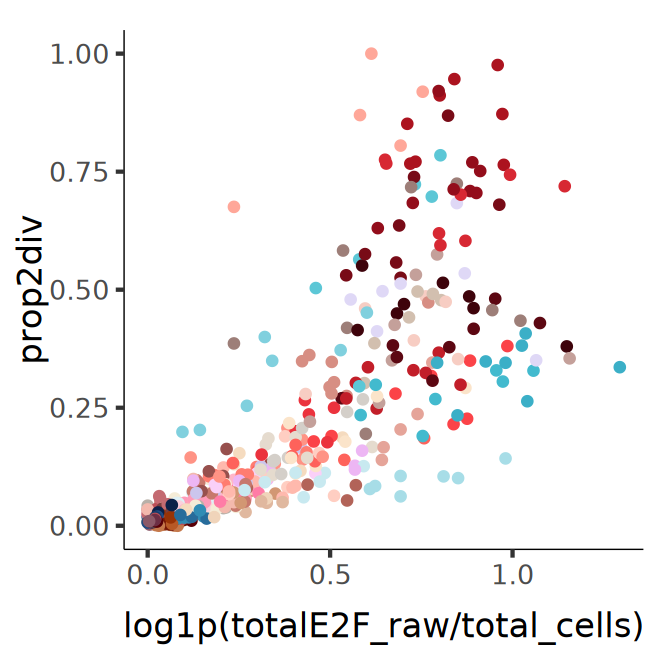

In [400]:
scatter_plot <- ggplot(mrg, 
                       aes(x = log1p(totalE2F_raw/total_cells), 
                           y = prop2div, color = cell_type)) +
  geom_point(size = 2.5, stroke = 0.5) +  
  scale_color_manual(values = colorcode) + 
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 20), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 0.3),
      axis.line.y = element_line(size = 0.3)
    ) +
    labs(fill = "Cell type") +
    guides(
      fill = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 22, size = 5, stroke = 0)  # squares in legend
      ))

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot

In [401]:
ggsave("./data/scatter_plot_Fig6_E2Fabundance.pdf", 
       scatter_plot, width = 5.5, height = 5.5, 
       units = "in", useDingbats = FALSE)


In [105]:
str(mrg)

'data.frame':	501 obs. of  19 variables:
 $ sample              : chr  "BM1_ASDC" "BM1_B Memory-1" "BM1_B Memory-2" "BM1_CD4 TCM" ...
 $ prop2div            : num  0.0965 0.0193 0.016 0.014 0.0105 ...
 $ cell_type           : Factor w/ 68 levels "HSC-2","MPP-1",..: 67 35 36 38 41 65 66 57 26 51 ...
 $ totalE2F_norm_sum   : num  2.27 8.83 16.12 141.36 85.31 ...
 $ totalRB_norm_sum    : num  7.11 83.88 446.13 1682.55 770.4 ...
 $ totalRB1_norm_sum   : num  3 55.5 334.7 481.2 255.3 ...
 $ totalCDKN_norm_sum  : num  43.3 105.4 575.6 2713.9 1158.8 ...
 $ totalCDKN1_norm_sum : num  7.44 70.38 239.6 1429.89 595.9 ...
 $ totalCDK246_norm_sum: num  16.7 26.6 144.1 687.8 377.7 ...
 $ totalCDK46_norm_sum : num  14.4 24.5 136.5 660.2 343.2 ...
 $ totalE2F_raw        : num  2 4 6 49 23 28 7 35 2 31 ...
 $ totalRB_raw         : num  7 34 165 595 216 113 64 161 11 50 ...
 $ totalRB1_raw        : num  3 22 124 168 74 72 50 93 6 24 ...
 $ totalCDKN_raw       : num  42 39 216 955 313 248 108 357 19 82 .

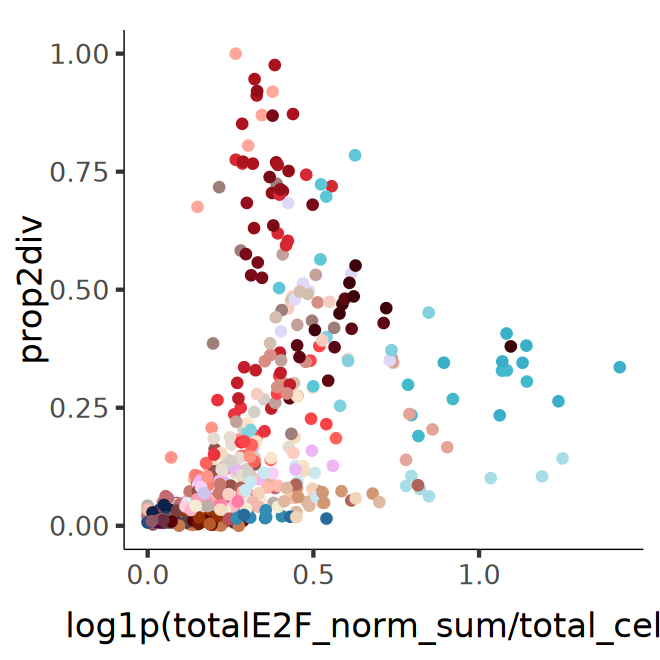

In [402]:
scatter_plot <- ggplot(mrg, 
                       aes(x = log1p(totalE2F_norm_sum/total_cells), 
                           y = prop2div, color = cell_type)) +
  geom_point(size = 2.5, stroke = 0.5) + 
  scale_color_manual(values = colorcode) +  
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 20), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 0.3),
      axis.line.y = element_line(size = 0.3)
    ) +
    labs(fill = "Cell type") +
    guides(
      fill = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 22, size = 5, stroke = 0)  
      ))

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot

In [403]:
ggsave("./data/scatter_plot_Fig6_E2Fconc.pdf", 
       scatter_plot, width = 5.5, height = 5.5, 
       units = "in", useDingbats = FALSE)


In [146]:
str(mrg)

'data.frame':	501 obs. of  19 variables:
 $ sample              : chr  "BM1_ASDC" "BM1_B Memory-1" "BM1_B Memory-2" "BM1_CD4 TCM" ...
 $ prop2div            : num  0.0965 0.0193 0.016 0.014 0.0105 ...
 $ cell_type           : Factor w/ 68 levels "HSC-2","MPP-1",..: 67 35 36 38 41 65 66 57 26 51 ...
 $ totalE2F_norm_sum   : num  2.27 8.83 16.12 141.36 85.31 ...
 $ totalRB_norm_sum    : num  7.11 83.88 446.13 1682.55 770.4 ...
 $ totalRB1_norm_sum   : num  3 55.5 334.7 481.2 255.3 ...
 $ totalCDKN_norm_sum  : num  43.3 105.4 575.6 2713.9 1158.8 ...
 $ totalCDKN1_norm_sum : num  7.44 70.38 239.6 1429.89 595.9 ...
 $ totalCDK246_norm_sum: num  16.7 26.6 144.1 687.8 377.7 ...
 $ totalCDK46_norm_sum : num  14.4 24.5 136.5 660.2 343.2 ...
 $ totalE2F_raw        : num  2 4 6 49 23 28 7 35 2 31 ...
 $ totalRB_raw         : num  7 34 165 595 216 113 64 161 11 50 ...
 $ totalRB1_raw        : num  3 22 124 168 74 72 50 93 6 24 ...
 $ totalCDKN_raw       : num  42 39 216 955 313 248 108 357 19 82 .

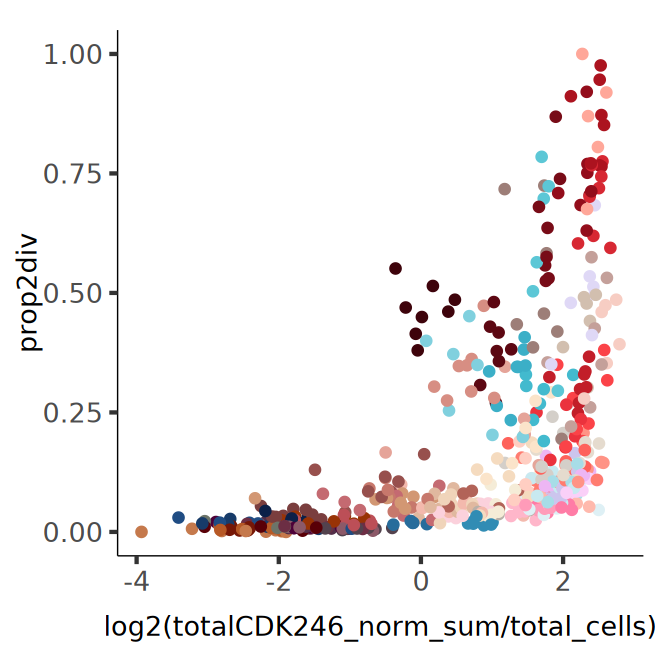

In [408]:
scatter_plot <- ggplot(mrg, 
                       aes(x = log2(totalCDK246_norm_sum/total_cells), 
                           y = prop2div, 
                           
                           color = cell_type)) +
  geom_point(size = 2.5, stroke = 0.5) + 
  scale_color_manual(values = colorcode) + 
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 16), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 0.3),
      axis.line.y = element_line(size = 0.3)
    ) +
    labs(fill = "Cell type") +
    guides(
      fill = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 22, size = 5, stroke = 0)  # squares in legend
      ))

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot

In [409]:
ggsave("./data/scatter_plot_Fig7_celltypes.pdf", 
       scatter_plot, width = 5.5, height = 5.5, 
       units = "in", useDingbats = FALSE)

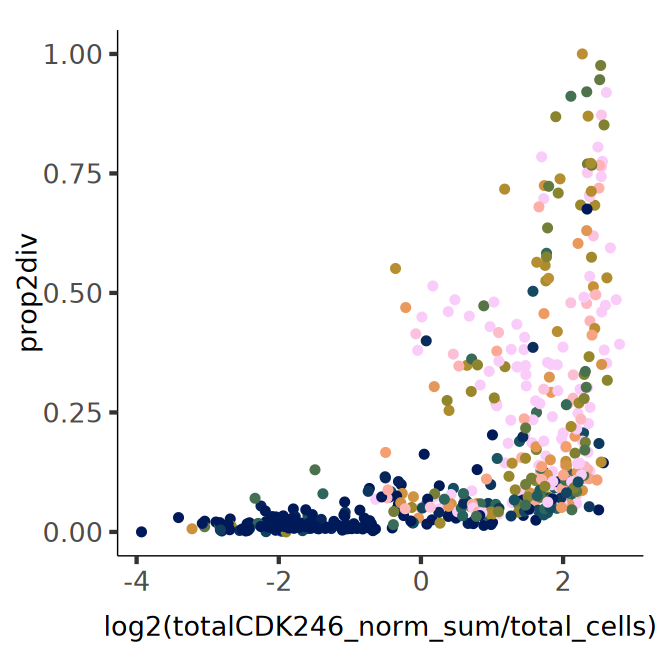

In [411]:
ratio_vals <- mrg$totalE2F_raw / mrg$totalRB_raw
upper_limit <- quantile(ratio_vals, 0.85, na.rm = TRUE)


library(scico)

upper_limit <- 1

scatter_plot <- ggplot(mrg, 
                       aes(x = log2(totalCDK246_norm_sum / total_cells), 
                           y = prop2div, 
                           color = totalE2F_raw / totalRB_raw)) +
  geom_point(shape = 16, size = 2.5) +
  scale_color_scico(
    palette = "batlow",
    direction = 1,
    name = "E2F/RB+RBL1+RBL2",
    limits = c(0.3, upper_limit), 
    oob = scales::squish
  ) +
  theme_classic(base_size = 20, base_family = "sans") +
  theme(
    aspect.ratio = 1,
    axis.text = element_text(size = 16), 
    axis.title = element_text(size = 16), 
    axis.title.x = element_text(vjust = -1),
    plot.title = element_text(hjust = 0.5, size = 26, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
    legend.title = element_text(color = "black", size = 18, face = "bold"), 
    legend.text = element_text(color = "black", size = 18),
    axis.line.x = element_line(size = 0.3),
    axis.line.y = element_line(size = 0.3)
  ) +
  guides(color = guide_colorbar(barwidth = 1, barheight = 8)) +
  coord_fixed()

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot


In [412]:
ggsave("./data/scatter_plot_Fig7_colorcode.pdf", 
       scatter_plot, width = 5.5, height = 5.5, 
       units = "in", useDingbats = FALSE)